### Machine Learning for Data Quality Prediction
**Description**: Use a machine learning model to predict data quality issues.

**Steps**:
1. Create a mock dataset with features and label (quality issue/label: 0: good, 1: issue).
2. Train a machine learning model.
3. Evaluate the model performance.

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         7

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

Confusion Matrix:


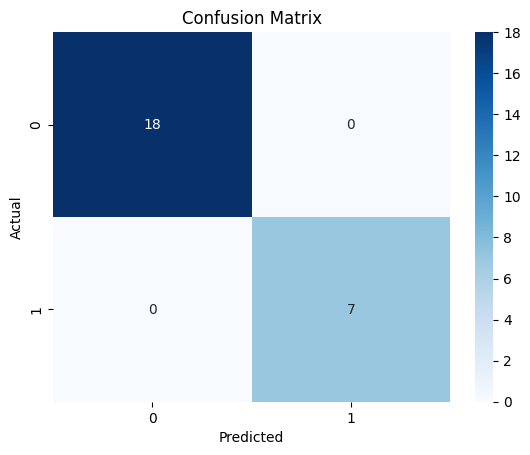

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)
n_samples = 100
data = {
    'missing_values': np.random.randint(0, 2, size=n_samples),
    'duplicate_values': np.random.randint(0, 2, size=n_samples),
    'inconsistent_format': np.random.randint(0, 2, size=n_samples),
    'outliers': np.random.randint(0, 2, size=n_samples),
    'valid_entries': np.random.randint(0, 2, size=n_samples),
}
df = pd.DataFrame(data)
df['quality_issue'] = ((df[['missing_values', 'duplicate_values', 'inconsistent_format', 'outliers']].sum(axis=1)) > 2).astype(int)
X = df.drop('quality_issue', axis=1)
y = df['quality_issue']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}\n')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()